In [104]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [105]:
df=pd.read_csv("insurance.csv")


#EDA

In [106]:
df.shape

(1338, 7)

In [107]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [109]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [110]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [111]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

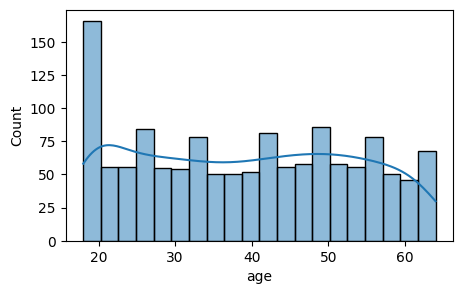

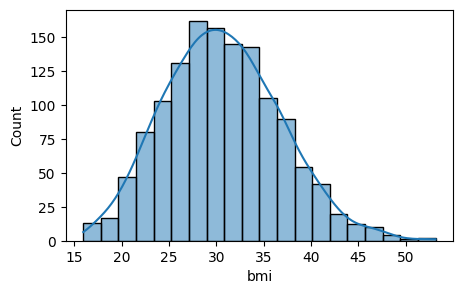

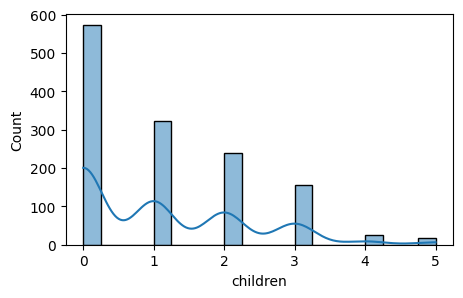

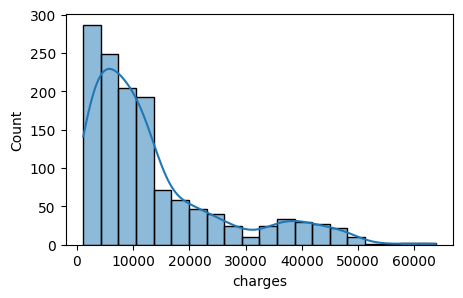

In [112]:
numeric_columns=['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(5,3)) #600 * 400 pixel
    sns.histplot(df[col],kde=True, bins=20)

<Axes: xlabel='children', ylabel='count'>

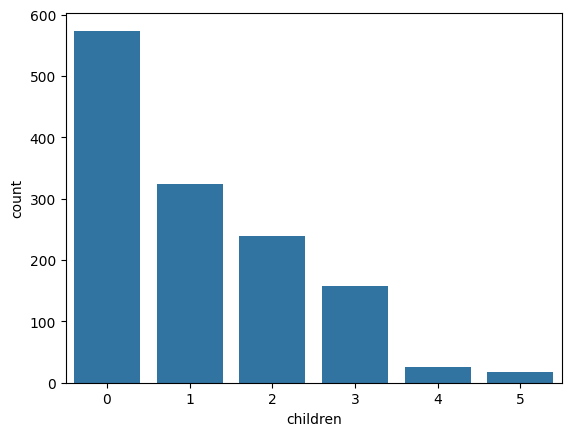

In [113]:
sns.countplot(x=df["children"])

<Axes: xlabel='sex', ylabel='count'>

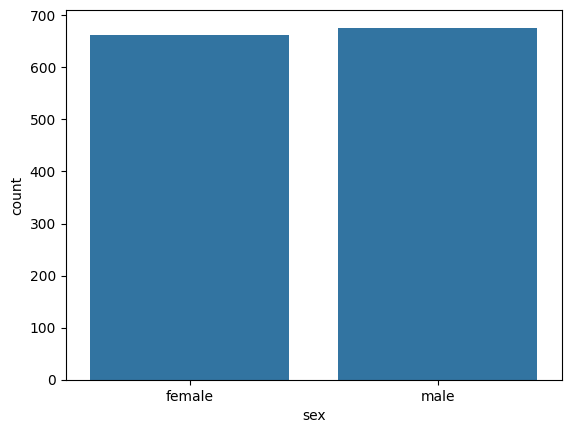

In [114]:
sns.countplot(x=df["sex"])

<Axes: xlabel='smoker', ylabel='count'>

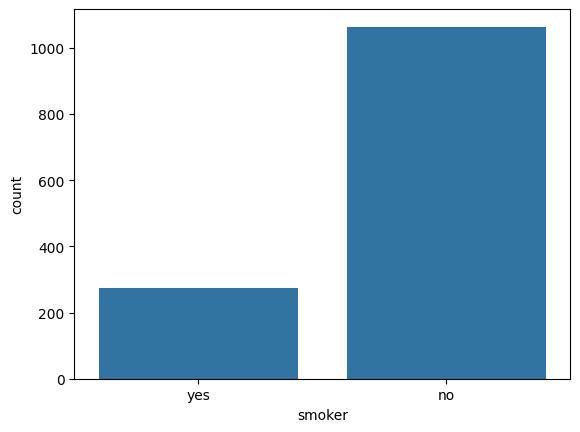

In [115]:
sns.countplot(x=df["smoker"])

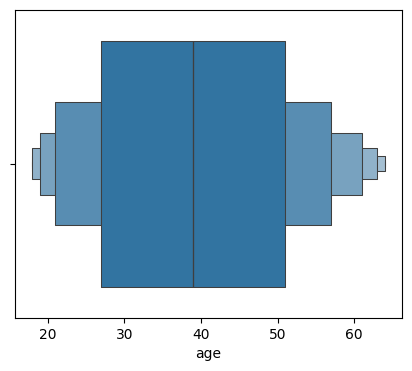

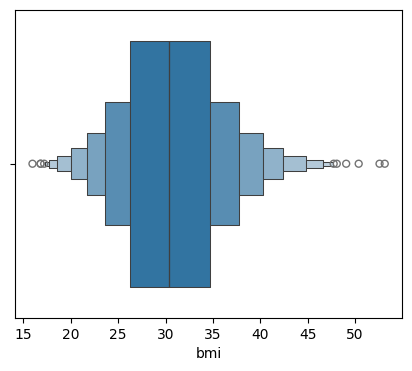

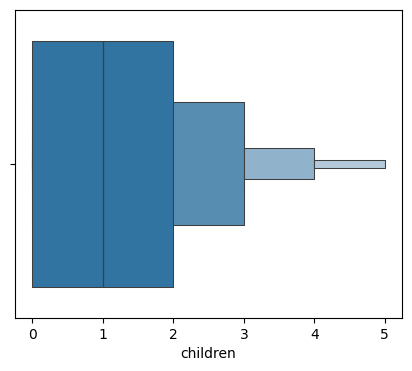

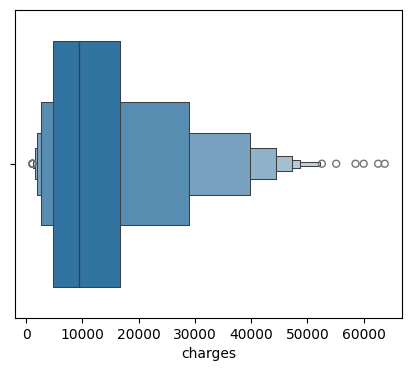

In [116]:
for col in numeric_columns:
    plt.figure(figsize=(5,4))
    sns.boxenplot(x=df[col])

<Axes: >

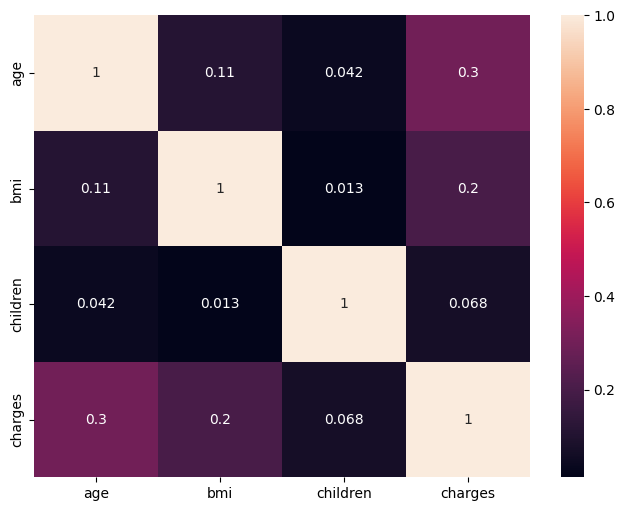

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data cleaning and preprocessing

In [118]:
df_cleaned=df.copy()
df_cleaned.head()
df_cleaned.drop_duplicates(inplace=True)

In [119]:
df_cleaned.shape #one row found dublicate

(1337, 7)

In [120]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [121]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [122]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [123]:
df_cleaned.head()
df_cleaned["sex"]=df_cleaned["sex"].map({"male":0,"female":1})


In [124]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [125]:
df_cleaned["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [126]:
df_cleaned["smoker"]=df_cleaned["smoker"].map({"no":0,"yes":1})

In [127]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [128]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker": "is_smoker"         
            },inplace=True )

In [129]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [130]:
df_cleaned["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [131]:
df_cleaned=pd.get_dummies(df_cleaned,columns=["region"],drop_first=True)

In [132]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [133]:
df_cleaned=df_cleaned.astype(int)

In [134]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


#Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

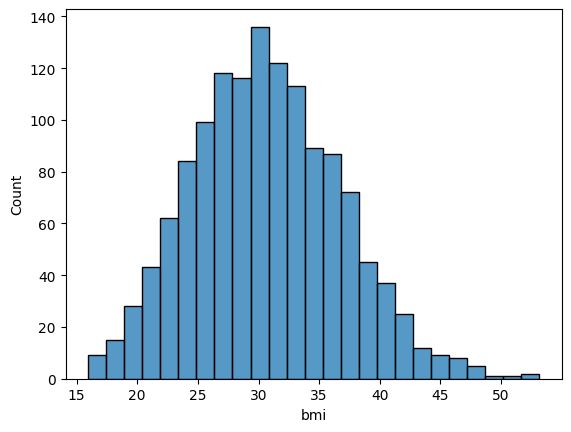

In [135]:
sns.histplot(df["bmi"])

<Axes: xlabel='bmi', ylabel='Count'>

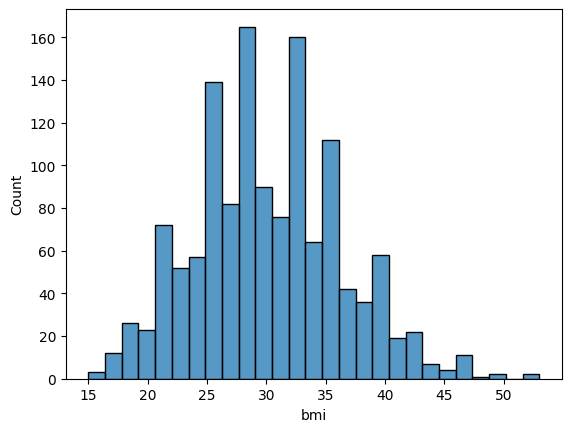

In [136]:
sns.histplot(df_cleaned["bmi"])

In [137]:
df_cleaned["bmi_category"]=pd.cut(
    df_cleaned["bmi"],
    bins=[0,18.5,24.9,29.9,float("inf")], #inf=infinity
    labels=["underweight","Normal","Overweight","obesity"]
)

In [138]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,obesity
2,28,0,33,3,0,4449,0,1,0,obesity
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obesity
1334,18,1,31,0,0,2205,0,0,0,obesity
1335,18,1,36,0,0,1629,0,1,0,obesity
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [139]:
df_cleaned=pd.get_dummies(df_cleaned,columns=["bmi_category"],drop_first=True)

In [140]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_obesity
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [141]:
df_cleaned=df_cleaned.astype(int)

In [142]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [143]:
#uses for scaling from 0 and 1.
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [144]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


Extraction column which is useable

In [145]:
from scipy.stats import pearsonr

selected_feature=[
    'age','is_female','bmi','children',
    'is_smoker','region_northwest',
    'region_southeast', 'region_southwest',	'bmi_category_Normal',
    'bmi_category_Overweight','bmi_category_obesity'
]

correlations = {
    feature: 
    pearsonr(df_cleaned[feature],
            df_cleaned["charges"])[0]
    for feature in selected_feature
}

correlation_df=pd.DataFrame(
    list(correlations.items()),
    columns=['feature','pearson correlation']
    )
correlation_df.sort_values(by="pearson correlation",ascending=False)

,feature,pearson correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obesity,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [146]:
from scipy.stats import chi2_contingency
import pandas as pd
cat_features=[
    'is_female','is_smoker','region_northwest',
    'region_southeast', 'region_southwest',	'bmi_category_Normal',
    'bmi_category_Overweight','bmi_category_obesity'
]
alpha =0.05
df_cleaned["charges_bin"]= pd.qcut(df_cleaned['charges'],q=4,labels=False)

chi2_results={}

for col in cat_features:
    Contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    
    chi2_stat, p_val, _, _ = chi2_contingency(Contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    
    chi2_results[col] = {
        'Chi2_statistic': chi2_stat,
        'P_value': p_val,
        'Decision': decision
    }

    chi2_df=pd.DataFrame(chi2_results).T
    chi2_df=chi2_df.sort_values(by='P_value')
    
    

In [147]:
chi2_df

,Chi2_statistic,P_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [148]:
final_df=df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast','bmi_category_obesity']]

In [149]:
final_df.shape

(1337, 8)

In [150]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [155]:
#RandomForestRegressor with log

X = final_df.drop('charges', axis=1)
y = final_df['charges']

y_log = np.log1p(y)  #charges in log suppose 10000 charge in log 9.21 

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

rnd_model = RandomForestRegressor(
    n_estimators=300,  # how many tree decision make
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rnd_model.fit(X_train, y_train)
y_pred_rf_log = rnd_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)
y_test_original = np.expm1(y_test)

print("\nRandom Forest Results with log")
print("R2 Score:", r2_score(y_test_original, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_original, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred_rf)))

print("MAE% = ",(mean_absolute_error(y_test_original, y_pred_rf)/df["charges"].mean()*100).round(2))
print("RMSE% = ",(np.sqrt(mean_squared_error(y_test_original, y_pred_rf))/df["charges"].mean()*100).round(2))

print(final_df["charges"].mean().round(2))


Random Forest Results with log
R2 Score: 0.8978075140057279
MAE: 2132.402779883033
RMSE: 4333.415645166895
MAE% =  16.07
RMSE% =  32.65
13278.63


In [152]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rnd_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

#Random Forest significantly outperformed Linear Regression, achieving an R² of 0.887 compared to 0.719.
# This indicates that insurance charges exhibit strong non-linear patterns, particularly driven by 
# smoking status and age interactions, which tree-based models capture more effectively

                Feature  Importance
4             is_smoker    0.456146
0                   age    0.402418
2                   bmi    0.057304
3              children    0.050200
6  bmi_category_obesity    0.016322
1             is_female    0.010171
5      region_southeast    0.007439


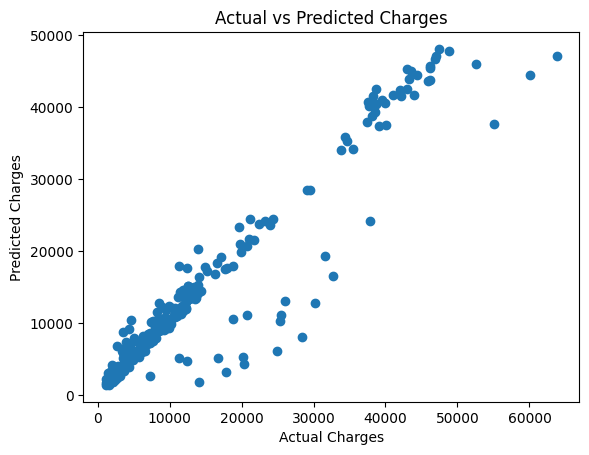

In [153]:
import matplotlib.pyplot as plt

plt.scatter(y_test_original, y_pred_rf)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [154]:
import pickle

# Save model
with open("model.pkl", "wb") as file:
    pickle.dump(rnd_model, file)

print("Model saved successfully!")

Model saved successfully!
